# HW5: Prob 1: Create a 2D embedding of the CIFAR-10 comparing different manifold learning algorithms

The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) is not that unlike the MNIST data set in that it is is 6K instances of small images. Unlike MNIST they are color images which are 32x32x3 (32 pixels wide, 32 pixels high, 3 color channels). The 3 color channels are red, green and blue. Each pixel is represented by a number between 0 and 255. The data set is divided into 10 classes. The classes are airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. The data set is available in the keras.datasets module. You can load it with the following code:

```python
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
```

Your goal is to compare different manifold learning algorithms on this data set. You should use the following algorithms:

* Principle Component Analysis
* Isomap Embedding
* Locally Linear Embedding
* Multidimensional scaling.
* SpectralEmbedding
* T-distributed Stochastic Neighbor Embedding

All of these algorithms are available in the sklearn library. In addition you should use also try the UMAP algorithm which is available for python as a library [umap](https://umap-learn.readthedocs.io/en/latest/basic_usage.html). In each of these cases you should project the data into 2D and color the data by the class in which it belongs.

Two references which might help the [sklearn documentation](https://scikit-learn.org/stable/modules/manifold.html) and Jake Vanderplas' book [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html). 

Practice creating a well formatted Jupyter notebook. You should have a title, a description of the data set, a description of the algorithms, a description of the results, and a discussion of the results. You should also have a conclusion. Your notebook should not have lots of code cells with no explanation. It should also not have lots of text outputs. You may need that during your development but by the time you submit, please clean it up.


# 2D Embedding of the CIFAR-10 Dataset Using Different Manifold Techniques

The goal of this notebook is to explore different manifold learning techniques, which are approaches to dimensionality reduction and is useful for visualizing high dimensional datasets in more interpretable dimensions, like 2D. 

The different techniques explored in this notebook are:
* Principle Component Analysis
* Isomap Embedding 
* Locally Linear Embedding 
* Multidimensional Scaling 
* Spectral Embedding
* T-Distributed Stochastic Neighbor Embedding

For each technique, the CIFAR-10 dataset will be projected into 2D, with the data colored by class. 

### Libraries

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from keras.datasets import cifar10
from sklearn.decomposition import PCA

2023-03-10 20:40:29.513020: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Data Loading

For the purposes of this investigation, the CIFAR-10 Dataset will be used. This dataset contains 50,000 32x32 pixel color training images and 10,000 test images, which are labeled. The labeled classes are as follows:

0 = airplane

1 = automobile

2 = bird 

3 = cat 

4 = deer

5 = dog 

6 = frog

7 = horse 

8 = ship

9 = truck

In [2]:
#loading CIFAR-10 Dataset from keras 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
#creating dictionary for label outputs 
labels = {0:'airplane',1:'automobile',
          2:'bird',3:'cat',4:'deer',
          5:'dog',6:'frog',7:'horse',
          8:'ship',9:'truck'}

Visualization of the first 16 images in the dataset.

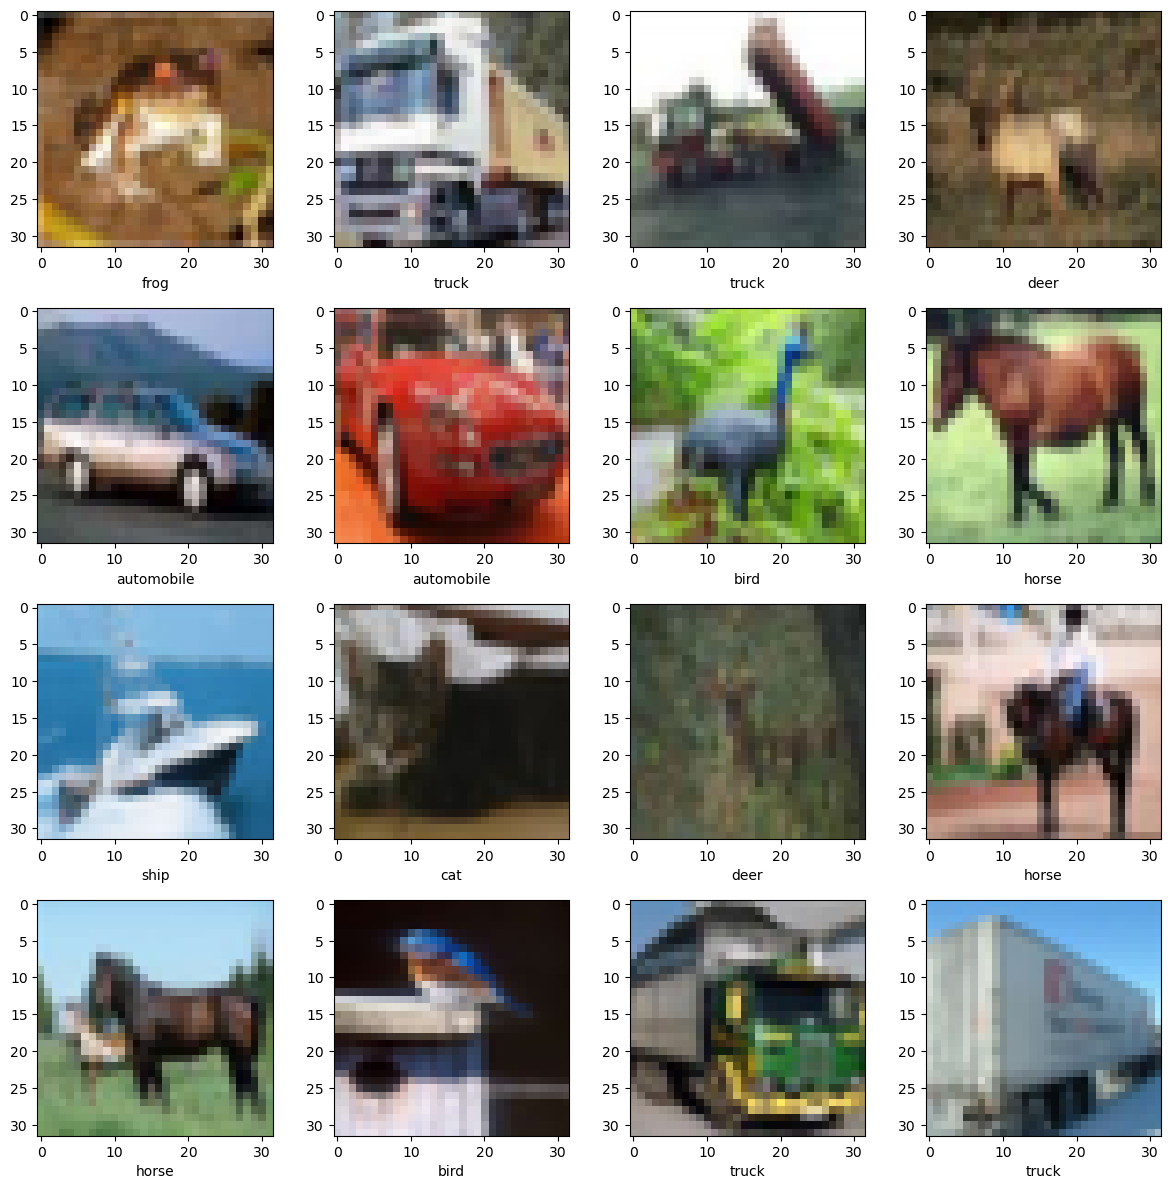

In [3]:
#visualization of dataset 
fig,ax=plt.subplots(4,4,figsize=(12,12))
ax=ax.ravel()

for i in range(16):
    ax[i].imshow(X_train[i])
    ax[i].set(xlabel=labels[int(y_train[i])])

plt.tight_layout()

The dataset will need to be reshaped such that the dimensions for each image is transformed from (32,32,3) to (-1,3072). Additionally, the images will be normalized, such that the intensity values for each pixel is between 0 and 1.  

In [4]:
#reshaping data 
X_train = X_train.reshape(-1,3072)
X_test = X_test.reshape(-1,3072)

#convert y data into numpy array of int
y_train = np.array(list(map(int,y_train)))
y_test = np.array(list(map(int,y_test)))

In [5]:
#normalizing the dataset
X_train = X_train/255
X_test = X_test/255

### Functions

In [6]:
#function for plotting 
def plot_2D(x,y,hue,title,x_lab,y_lab):
    fig = sns.scatterplot(x=x,y=y,hue=hue,
                    palette=sns.color_palette('bright',10),
                    legend='full',alpha=0.25,s=15)
    fig.legend(bbox_to_anchor=(1,1))
    sns.set(rc={"figure.figsize":(5, 5)})
    plt.title(title)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    return fig

### Principal Component Analysis

Principal Component Analysis (PCA) is a linear, unsupervised feature extraction technique, which relies on finding principal components, which are linear combinations of the initial dataset features, that maximize the variance explained by the data. The first principal component will contain the most explained variance, with subsequent components explaining less and less of the variance of the data. It is then possible to choose a number of the principal components that will be "kept" for machine learning based on certain criteria or thresholds to reduce the dimensionality of the dataset. 

Since we want to visualize the data in a 2D plot, n_components will be set to 2. 

In [7]:
#initialize pca model 
pca = PCA(n_components=2)
#fitting on training data 
pca.fit(X_train)

PCA(n_components=2)

In [8]:
#transforming X_train and X_test data 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

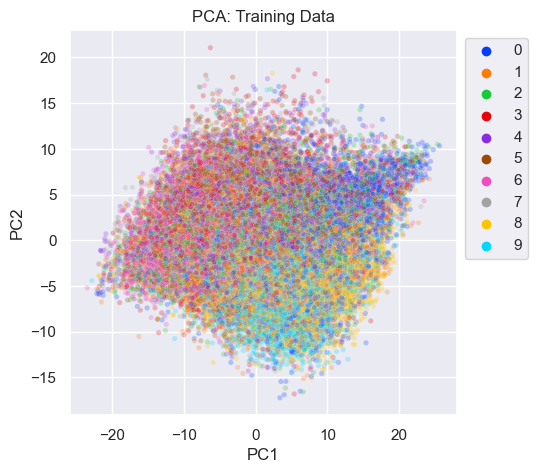

In [10]:
#plotting X_train
plot_2D(X_train_pca[:,0],X_train_pca[:,1],y_train,
        'PCA: Training Data','PC1','PC2');

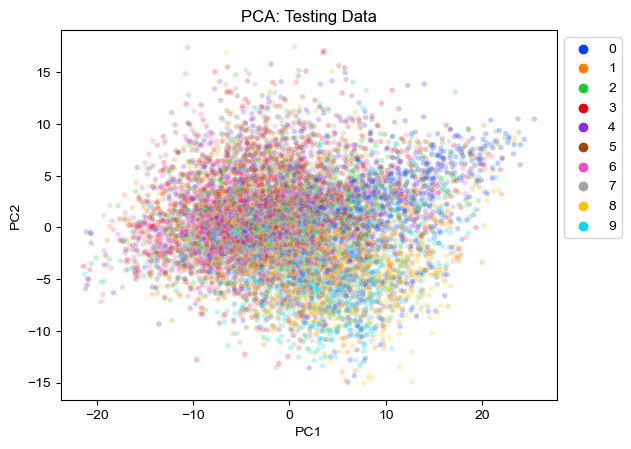

In [9]:
#plotting X_test
plot_2D(X_test_pca[:,0],X_test_pca[:,1],y_test,
        'PCA: Testing Data','PC1','PC2');

### Isomap Embedding 